In [1]:
import torch
import torch.nn as nn

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [108]:
class lenet(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), padding=2), # output 6x28x28
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), # output 6x14x14
            nn.ReLU(),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)), # output 16x10x10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), # output 16x5x5
            nn.Flatten(),
            nn.Linear(in_features=(16*5*5), out_features=120), # output 1x120
            nn.ReLU(),
            nn.Linear(120, 84), # output 1x84
            nn.ReLU(),
            nn.Linear(84, 10), # output 1x10
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [51]:
from torchvision.datasets import MNIST

mnist_train = MNIST(root="../datasets/", train=True, download=False)
mnist_test = MNIST(root="../datasets/", train=False, download=False)

X_train = mnist_train.data.type(torch.float)
Y_train = mnist_train.targets

X_test = mnist_test.data.type(torch.float)
Y_test = mnist_test.targets

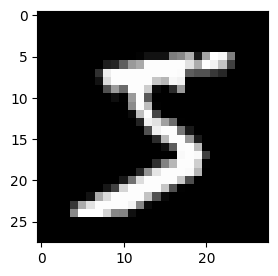

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0], cmap='gray')

In [49]:
danet = lenet()
sample = X_train[0]
sample = sample.unsqueeze(dim=0).unsqueeze(dim=0)
danet(sample)

tensor([[ 1.1648,  2.3776,  4.5735, -1.2245,  0.5846, -5.7057, -0.3520,  0.3285,
          0.2946, -0.9176]], grad_fn=<AddmmBackward0>)

In [63]:
from tqdm import tqdm
import numpy as np
from random import randint 

In [147]:
danet = lenet()
def acc_fn(pred, target):
    return (pred.argmax(dim=1)==target).sum()

In [165]:
BS = 32

N_EPOCHS = 10
N_DATA = len(Y_train)

BATCH_EPOCHS = int(N_DATA / BS)

loss_fn = nn.NLLLoss()
optim = torch.optim.SGD(params=danet.parameters(), lr=0.001, momentum=0.1)

losses = []
accs = []

for _ in tqdm(range(N_EPOCHS)):

    for b in range(BATCH_EPOCHS):
        i = randint(0, len(Y_train) - BS)
        optim.zero_grad()
        pred = danet(X_train[i:i+BS].reshape(BS, 1, 28, 28))
        target = Y_train[i:i+BS] 
        loss = loss_fn(pred, target)
        # percentage
        acc = acc_fn(pred, target).item() / BS * 100.0
        losses.append(loss.item()/BS)
        accs.append(acc)
        loss.backward()
        optim.step()
        if b % 250 == 0: 
            print("batch", b, "/", BATCH_EPOCHS)
            print("acc  ", acc, "%")

  0%|          | 0/10 [00:00<?, ?it/s]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   93.75 %
batch 500 / 1875
acc   93.75 %
batch 750 / 1875
acc   96.875 %
batch 1000 / 1875
acc   96.875 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   93.75 %
batch 1750 / 1875
acc   96.875 %


 10%|█         | 1/10 [00:11<01:40, 11.15s/it]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   100.0 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   96.875 %
batch 1000 / 1875
acc   96.875 %
batch 1250 / 1875
acc   96.875 %
batch 1500 / 1875
acc   96.875 %
batch 1750 / 1875
acc   100.0 %


 20%|██        | 2/10 [00:21<01:26, 10.84s/it]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   96.875 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   93.75 %
batch 1000 / 1875
acc   100.0 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   96.875 %


 30%|███       | 3/10 [00:32<01:15, 10.81s/it]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   100.0 %
batch 500 / 1875
acc   100.0 %
batch 750 / 1875
acc   96.875 %
batch 1000 / 1875
acc   96.875 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   96.875 %
batch 1750 / 1875
acc   93.75 %


 40%|████      | 4/10 [00:43<01:04, 10.74s/it]

batch 0 / 1875
acc   96.875 %
batch 250 / 1875
acc   96.875 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   100.0 %
batch 1000 / 1875
acc   100.0 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   96.875 %
batch 1750 / 1875
acc   100.0 %


 50%|█████     | 5/10 [00:53<00:53, 10.67s/it]

batch 0 / 1875
acc   96.875 %
batch 250 / 1875
acc   96.875 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   100.0 %
batch 1000 / 1875
acc   96.875 %
batch 1250 / 1875
acc   96.875 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   96.875 %


 60%|██████    | 6/10 [01:04<00:42, 10.63s/it]

batch 0 / 1875
acc   96.875 %
batch 250 / 1875
acc   100.0 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   96.875 %
batch 1000 / 1875
acc   100.0 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   100.0 %


 70%|███████   | 7/10 [01:15<00:31, 10.66s/it]

batch 0 / 1875
acc   96.875 %
batch 250 / 1875
acc   96.875 %
batch 500 / 1875
acc   96.875 %
batch 750 / 1875
acc   100.0 %
batch 1000 / 1875
acc   96.875 %
batch 1250 / 1875
acc   96.875 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   100.0 %


 80%|████████  | 8/10 [01:25<00:21, 10.64s/it]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   100.0 %
batch 500 / 1875
acc   100.0 %
batch 750 / 1875
acc   100.0 %
batch 1000 / 1875
acc   100.0 %
batch 1250 / 1875
acc   100.0 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   100.0 %


 90%|█████████ | 9/10 [01:36<00:10, 10.69s/it]

batch 0 / 1875
acc   100.0 %
batch 250 / 1875
acc   100.0 %
batch 500 / 1875
acc   100.0 %
batch 750 / 1875
acc   96.875 %
batch 1000 / 1875
acc   100.0 %
batch 1250 / 1875
acc   93.75 %
batch 1500 / 1875
acc   100.0 %
batch 1750 / 1875
acc   96.875 %


100%|██████████| 10/10 [01:47<00:00, 10.70s/it]


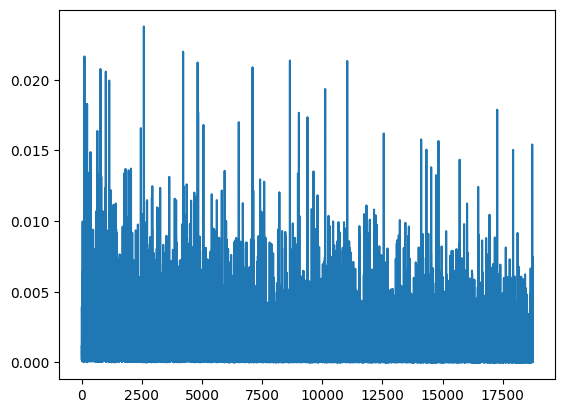

In [166]:
plt.plot(losses)

In [168]:
danet.eval()

i = randint(0, 10000)
eval_sample = X_test[i].unsqueeze(dim=0).unsqueeze(dim=0)
eval_target = Y_test[i]
# plt.imshow(eval_sample.squeeze())

danet(eval_sample).argmax(), eval_target

eval_data = X_test.reshape(10000, 1, 28, 28)
acc_fn(danet(eval_data), Y_test) / len(Y_test) * 100

tensor(98.4200)